# chapter 5. Regression

## Polynomial Regression and Overfitting, Underfitting

### 다항 회귀 이해 

**회귀가 독립 변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현**되는 것을 **다항 회귀**라고 한다. <br> 
사이킷런은 다항 회귀 역시 선형 회귀이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다. <br>
사이킷런은 **PolynomialFeatures Class**를 통해 피처를 Polynomial 피처로 변환한다. <br>
PolynomialFeatures Class는 degree 파라미터를 통해 입력받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환한다. 

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [2]:
def polynomial_func(X):
    y = 1 + 2 * X[:,0] + 3 * X[:,0] ** 2 + 4 * X[:,1] ** 3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


In [ ]:
# 3차 다항식 변환 
poly_ftr = PolynomialFeatures(degree = 3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2 * X[:,0] + 3 * X[:,0] ** 2 + 4 * X[:,1] ** 3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해 

다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링 할 수 있다. <br>
다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다. <br>
다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춘 학습이 이루어지기 때문에 오히려 테스트 데이터 환경에서는 예측 정확도가 떨어진다. <br>
즉 차수가 높아질수록 과적합의 문제가 크게 발생한다. 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격이다. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis = 1,inplace = False)


X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size = 0.3, random_state = 156)

## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합 
p_model = Pipeline([('poly', PolynomialFeatures(degree = 3, include_bias = False)),
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

In [ ]:
X_train_poly = PolynomialFeatures(degree = 2, include_bias = False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

### Polynomial Regression을 이용한 Underfitting, Overfitting 이해

코사인 곡선에 약간의 Noise 변동값을 더하여 실제값 곡선을 만든다. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환한다. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 random 값을 순서대로 sampling한 데이터이다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값이다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1

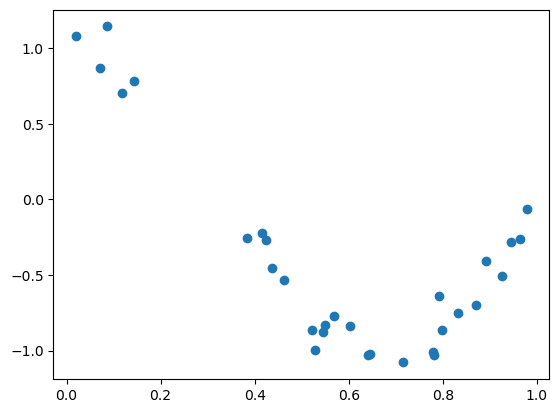

In [7]:
plt.scatter(X, y)


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.56 입니다.


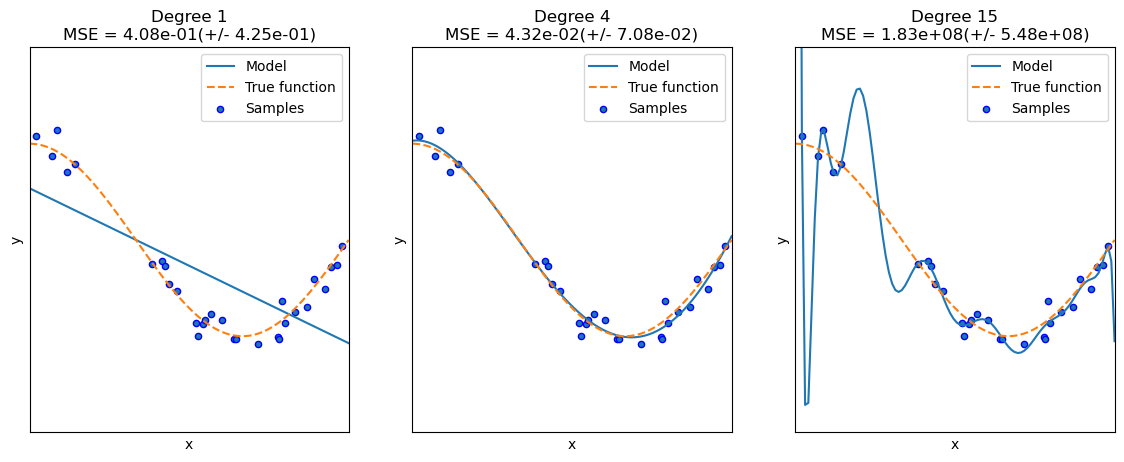

In [8]:
plt.figure(figsize = (14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교한다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks = (), yticks = ())
    
    # 개별 degree별로 Polynomial 변환한다. 
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가한다. 
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring = "neg_mean_squared_error", cv = 10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1 * np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행한다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교한다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = "Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label = "True function")
    plt.scatter(X, y, edgecolor ='b', s = 20, label = "Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc = "best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

### 편향-분산 트레이드오프 / Bias-Variance Trade Off

편향-분산 트레이드오프는 머신러닝이 극복해야 할 가장 큰 이슈 중 하나이다. <br>

- **고편향 모델** / High Bias : 매우 단순화된 모델로서 지나치게 한 방향성으로 치우친 경향
- **고분산 모델** / High Variance : 학습 데이터 하나 하나의 특성을 반영하면서 매우 복잡한 모델이 되고, 지나치게 높은 변동성을 가지게 된다. 

일반적으로 편향과 분산은 한쪽이 높으면 한쪽이 낮아지는 경향이 있다. <br>
즉 **편향이 높으면 분산은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아진다.(과적합)** <br>

편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다. 